In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### NASA JPL First Data Enrichment Feature Importance

In [ ]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from sklearn.multioutput import MultiOutputRegressor

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [ ]:
# If restarted always run the Import Libraries and authenticate using your google drive account
path = '/content/drive/MyDrive/Colab Notebooks/MLSpring-2021/teams/Underdog/Midterm-Project/Data/Data_Created/nasa_jpl_name_cleaned.csv'
df_orbit = pd.read_csv(path)

In [ ]:
pd.DataFrame(df_orbit.groupby('name')['neo'].count()).reset_index().sort_values(by='neo', ascending=False)

,name,neo
0,'Akepa,1
14782,Orlik,1
14790,Orosei,1
14789,Ornskoldsvik,1
14788,Ornicar,1
...,...,...
7392,Hambach,1
7391,Hamatonbetsu,1
7390,Hamanowa,1
7389,Hamanasu,1


In [ ]:
neo_sorted = df_orbit['neo'].unique()
neo_sorted.sort()
print(neo_sorted)

['N' 'Y']


In [ ]:
pd.DataFrame(df_orbit.groupby('name')['pha'].count()).reset_index().sort_values(by='pha', ascending=False)

,name,pha
0,'Akepa,1
14782,Orlik,1
14790,Orosei,1
14789,Ornskoldsvik,1
14788,Ornicar,1
...,...,...
7392,Hambach,1
7391,Hamatonbetsu,1
7390,Hamanowa,1
7389,Hamanasu,1


In [ ]:
pha_sorted = df_orbit['pha'].unique()
pha_sorted.sort()
print(pha_sorted)

['N' 'Y']


In [ ]:
neo = 'Y'
agg_neo_count = pd.DataFrame(df_orbit[df_orbit.neo == neo].groupby('name')['neo'].sum()).reset_index()
agg_neo_count.columns = ['name', 'neoCount']
# agg_neo_count['neo_name'] = pd.DataFrame(agg_neo_count['name'])
agg_neo_count

,name,neoCount
0,Abhramu,Y
1,Aditi,Y
2,Adonis,Y
3,Agni,Y
4,Ahau,Y
...,...,...
157,YORP,Y
158,Yuliya,Y
159,Zao,Y
160,Zephyr,Y


In [ ]:
pha = 'Y'
agg_pha_count = pd.DataFrame(df_orbit[df_orbit.pha == pha].groupby('name')['pha'].sum()).reset_index()
agg_pha_count.columns = ['name', 'phaCount']
# agg_pha_count['pha_name'] = pd.DataFrame(agg_pha_count['name'])
agg_pha_count

,name,phaCount
0,Adonis,Y
1,Agni,Y
2,Akhenaten,Y
3,Anagolay,Y
4,Apollo,Y
5,Apophis,Y
6,Aristaeus,Y
7,Asclepius,Y
8,Bennu,Y
9,Cacus,Y


In [ ]:
pha = agg_pha_count['phaCount']
neo = agg_neo_count['neoCount']

In [ ]:
first_Data = pd.concat([pha, neo], axis=1)

In [ ]:
# Combine the name with pha and neo
first_Data

,phaCount,neoCount
0,Y,Y
1,Y,Y
2,Y,Y
3,Y,Y
4,Y,Y
...,...,...
157,NaN,Y
158,NaN,Y
159,NaN,Y
160,NaN,Y


In [ ]:
# Merge the aggregated data to base data
mergeFirstData = df_orbit.merge(first_Data, how='left',left_index=True, right_index=True)

In [ ]:
mergeFirstData

,spkid,full_name,pdes,name,e,a,q,i,om,w,ma,ad,n,moid,neo,pha,phaCount,neoCount
0,2000001,1 Ceres (A801 AA),1,Ceres,0.078168,2.766089,2.549868,10.587900,80.272358,73.724890,205.545415,2.982310,0.214242,1.585370,N,N,Y,Y
1,2000002,2 Pallas (A802 FA),2,Pallas,0.229750,2.774382,2.136967,34.854459,172.965884,310.288113,187.586350,3.411796,0.213282,1.234870,N,N,Y,Y
2,2000003,3 Juno (A804 RA),3,Juno,0.256988,2.668020,1.982370,12.991482,169.853044,248.032767,170.711247,3.353669,0.226162,1.033160,N,N,Y,Y
3,2000004,4 Vesta (A807 FA),4,Vesta,0.088425,2.362030,2.153168,7.141652,103.808335,150.922482,258.567829,2.570893,0.271504,1.139330,N,N,Y,Y
4,2000005,5 Astraea (A845 XA),5,Astraea,0.190788,2.573621,2.082605,5.367534,141.571701,358.625009,65.612382,3.064636,0.238719,1.095630,N,N,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22174,2523954,523954 Guman (1998 UF23),523954,Guman,0.248904,2.223535,1.670088,5.765646,345.493583,19.037634,255.788398,2.776982,0.297261,0.667406,N,N,NaN,NaN
22175,2524607,524607 Davecarter (2003 QB89),524607,Davecarter,0.276757,2.208729,1.597448,3.560868,156.680874,148.150366,114.849292,2.820010,0.300255,0.581890,N,N,NaN,NaN
22176,2541132,541132 Leleakuhonua (2015 TG387),541132,Leleakuhonua,0.942773,1139.016708,65.183020,11.654552,300.780465,117.691237,359.464459,2212.850396,0.000026,64.211100,N,N,NaN,NaN
22177,2542888,542888 Confino (2013 MH11),542888,Confino,0.023057,2.511993,2.454073,13.204894,301.789782,310.380100,351.400048,2.569913,0.247558,1.448240,N,N,NaN,NaN


In [ ]:
mergeFirstData['phaCount'] = mergeFirstData['phaCount'].replace(np.nan, 0)
mergeFirstData['neoCount'] = mergeFirstData['neoCount'].replace(np.nan, 0)
# Rows
# mergeFirstData = mergeFirstData.dropna(subset=['phaCount','neoCount'] )

In [ ]:
mergeFirstData

,spkid,full_name,pdes,name,e,a,q,i,om,w,ma,ad,n,moid,neo,pha,phaCount,neoCount
0,2000001,1 Ceres (A801 AA),1,Ceres,0.078168,2.766089,2.549868,10.587900,80.272358,73.724890,205.545415,2.982310,0.214242,1.585370,N,N,Y,Y
1,2000002,2 Pallas (A802 FA),2,Pallas,0.229750,2.774382,2.136967,34.854459,172.965884,310.288113,187.586350,3.411796,0.213282,1.234870,N,N,Y,Y
2,2000003,3 Juno (A804 RA),3,Juno,0.256988,2.668020,1.982370,12.991482,169.853044,248.032767,170.711247,3.353669,0.226162,1.033160,N,N,Y,Y
3,2000004,4 Vesta (A807 FA),4,Vesta,0.088425,2.362030,2.153168,7.141652,103.808335,150.922482,258.567829,2.570893,0.271504,1.139330,N,N,Y,Y
4,2000005,5 Astraea (A845 XA),5,Astraea,0.190788,2.573621,2.082605,5.367534,141.571701,358.625009,65.612382,3.064636,0.238719,1.095630,N,N,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22174,2523954,523954 Guman (1998 UF23),523954,Guman,0.248904,2.223535,1.670088,5.765646,345.493583,19.037634,255.788398,2.776982,0.297261,0.667406,N,N,0,0
22175,2524607,524607 Davecarter (2003 QB89),524607,Davecarter,0.276757,2.208729,1.597448,3.560868,156.680874,148.150366,114.849292,2.820010,0.300255,0.581890,N,N,0,0
22176,2541132,541132 Leleakuhonua (2015 TG387),541132,Leleakuhonua,0.942773,1139.016708,65.183020,11.654552,300.780465,117.691237,359.464459,2212.850396,0.000026,64.211100,N,N,0,0
22177,2542888,542888 Confino (2013 MH11),542888,Confino,0.023057,2.511993,2.454073,13.204894,301.789782,310.380100,351.400048,2.569913,0.247558,1.448240,N,N,0,0


In [ ]:
# Transform the data for Feature Importance
mergeFirstData['full_name'] = mergeFirstData['full_name'].astype('category').cat.codes
mergeFirstData['name'] = mergeFirstData['name'].astype('category').cat.codes
mergeFirstData['neo'] = mergeFirstData['neo'].astype('category').cat.codes
mergeFirstData['pha'] = mergeFirstData['pha'].astype('category').cat.codes
# mergeFirstData['neo_name'] = mergeFirstData['neo'].astype('category').cat.codes
# mergeFirstData['pha_name'] = mergeFirstData['pha'].astype('category').cat.codes
mergeFirstData['neoCount'] = mergeFirstData['neoCount'].astype('category').cat.codes
mergeFirstData['phaCount'] = mergeFirstData['phaCount'].astype('category').cat.codes
mergeFirstData['e'] = mergeFirstData['e'].astype('int')
mergeFirstData['a'] = mergeFirstData['a'].astype('int')
mergeFirstData['q'] = mergeFirstData['q'].astype('int')
mergeFirstData['i'] = mergeFirstData['i'].astype('int')
mergeFirstData['om'] = mergeFirstData['om'].astype('int')
mergeFirstData['w'] = mergeFirstData['w'].astype('int')
mergeFirstData['ma'] = mergeFirstData['ma'].astype('int')
mergeFirstData['ad'] = mergeFirstData['ad'].astype('int')
mergeFirstData['n'] = mergeFirstData['n'].astype('int')
mergeFirstData['moid'] = mergeFirstData['moid'].astype('int')

In [ ]:
mergeFirstData.dtypes

spkid        int64
full_name    int16
pdes         int64
name         int16
e            int64
a            int64
q            int64
i            int64
om           int64
w            int64
ma           int64
ad           int64
n            int64
moid         int64
neo           int8
pha           int8
phaCount      int8
neoCount      int8
dtype: object

In [ ]:
mergeFirstData

,spkid,full_name,pdes,name,e,a,q,i,om,w,ma,ad,n,moid,neo,pha,phaCount,neoCount
0,2000001,0,1,3333,0,2,2,10,80,73,205,2,0,1,0,0,1,1
1,2000002,1,2,14973,0,2,2,34,172,310,187,3,0,1,0,0,1,1
2,2000003,2,3,9592,0,2,1,12,169,248,170,3,0,1,0,0,1,1
3,2000004,3,4,20646,0,2,2,7,103,150,258,2,0,1,0,0,1,1
4,2000005,4,5,1378,0,2,2,5,141,358,65,3,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22174,2523954,22174,523954,7225,0,2,1,5,345,19,255,2,0,0,0,0,0,0
22175,2524607,22175,524607,4394,0,2,1,3,156,148,114,2,0,0,0,0,0,0
22176,2541132,22176,541132,11365,0,1139,65,11,300,117,359,2212,0,64,0,0,0,0
22177,2542888,22177,542888,3949,0,2,2,13,301,310,351,2,0,1,0,0,0,0


In [ ]:
# Save cleaned data
path = '/content/drive/MyDrive/Colab Notebooks/MLSpring-2021/teams/Underdog/Midterm-Project/Data/Data_Created/nasa_jpl_firstdata_enrichment.csv'

mergeFirstData.to_csv(path, index=False)

# Second Data Enrichment - Feature selection

In [ ]:
path = '/content/drive/MyDrive/Underdog/nasa_jpl_firstdata_enrichment.csv'
mergeFirstData = pd.read_csv(path)
mergeFirstData

,spkid,full_name,pdes,name,e,a,q,i,om,w,ma,ad,n,moid,neo,pha,phaCount,neoCount
0,2000001,0,1,3333,0,2,2,10,80,73,205,2,0,1,0,0,1,1
1,2000002,1,2,14973,0,2,2,34,172,310,187,3,0,1,0,0,1,1
2,2000003,2,3,9592,0,2,1,12,169,248,170,3,0,1,0,0,1,1
3,2000004,3,4,20646,0,2,2,7,103,150,258,2,0,1,0,0,1,1
4,2000005,4,5,1378,0,2,2,5,141,358,65,3,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22174,2523954,22174,523954,7225,0,2,1,5,345,19,255,2,0,0,0,0,0,0
22175,2524607,22175,524607,4394,0,2,1,3,156,148,114,2,0,0,0,0,0,0
22176,2541132,22176,541132,11365,0,1139,65,11,300,117,359,2212,0,64,0,0,0,0
22177,2542888,22177,542888,3949,0,2,2,13,301,310,351,2,0,1,0,0,0,0


# -------------------Features list-----------------------
name: name
a: semi-major axis(au)
e: eccentricity
i: Inclination with respect to x-y ecliptic plane(deg)
om: Longitude of the ascending node
w: argument of perihelion
q: perihelion distance(au)
ad: aphelion distance(au)
neo: Near Earth Object
pha: Physically Hazardous Asteroid
moid: Earth Minimum orbit Intersection Distance(au)
n: Mean motion(deg/d)
ma: Mean anomaly(deg)

In [ ]:
X = mergeFirstData[['e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'moid',
       'pha', 'phaCount', 'neoCount']]
y = mergeFirstData['neo']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22179 entries, 0 to 22178
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   e         22179 non-null  int64
 1   a         22179 non-null  int64
 2   q         22179 non-null  int64
 3   i         22179 non-null  int64
 4   om        22179 non-null  int64
 5   w         22179 non-null  int64
 6   ma        22179 non-null  int64
 7   ad        22179 non-null  int64
 8   n         22179 non-null  int64
 9   moid      22179 non-null  int64
 10  pha       22179 non-null  int64
 11  phaCount  22179 non-null  int64
 12  neoCount  22179 non-null  int64
dtypes: int64(13)
memory usage: 2.2 MB


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Feature Importance

**Find the features that has the most relation to the feature 'neo', the near Earth object**

Feature ranking:
1. feature 10 (f0.274297)
2. feature 2 (f0.153617)
3. feature 1 (f0.122359)
4. feature 3 (f0.091187)
5. feature 4 (f0.086279)
6. feature 5 (f0.070702)
7. feature 7 (f0.068968)
8. feature 6 (f0.067486)
9. feature 8 (f0.042221)
10. feature 9 (f0.022754)
11. feature 11 (f0.000073)
12. feature 12 (f0.000057)
13. feature 0 (f0.000000)


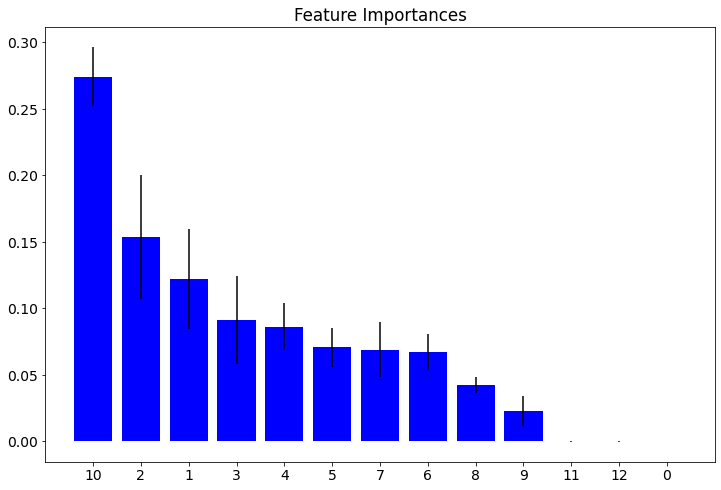

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
ef = ExtraTreesRegressor(n_estimators=250,random_state=0)
ef.fit(X,y)
importances = ef.feature_importances_
std = np.std([tree.feature_importances_ for tree in ef.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
#printing the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
  print("%d. feature %d (f%f)" % (f + 1, indices[f], importances[indices[f]])) 

#plot the impurity based feature importances of the forest
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color='b', yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
!pip install shap

     |████████████████████████████████| 358kB 4.4MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491626 sha256=709510fbbac2974aaaaca9a768e19d635d941e2fa418f6d143f0d18dfa61fbe8
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
import shap

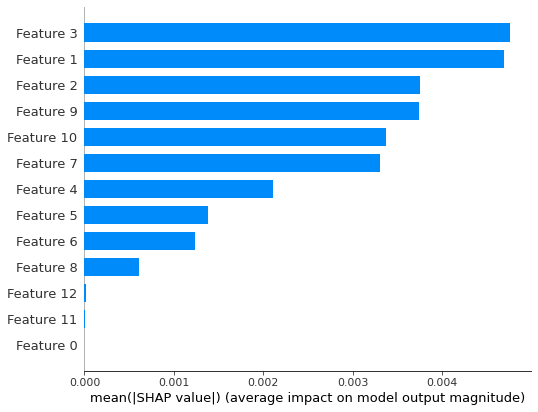

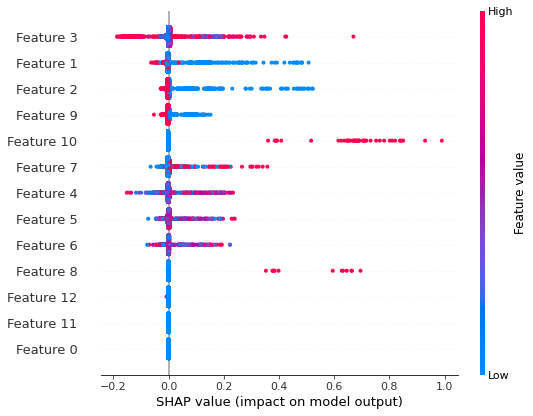

In [ ]:
explainer = shap.TreeExplainer(ef)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type='bar')
shap.summary_plot(shap_values,X)

Conclusion: The fatures i: Inclination with respect to x-y ecliptic plane(deg), q: perihelion distance(au), a: semi-major axis(au) are most realated to the neo.